# **GOLD PRICE PREDICTION**

Если вы когда-либо видели хотя бы один рекламный ролик по финансовому телевидению, вам говорили, что золото было, есть и навсегда останется величайшей инвестицией всех времен, учитывая его сохраняющуюся ценность, тысячелетнюю историю, дефицит и другие причины

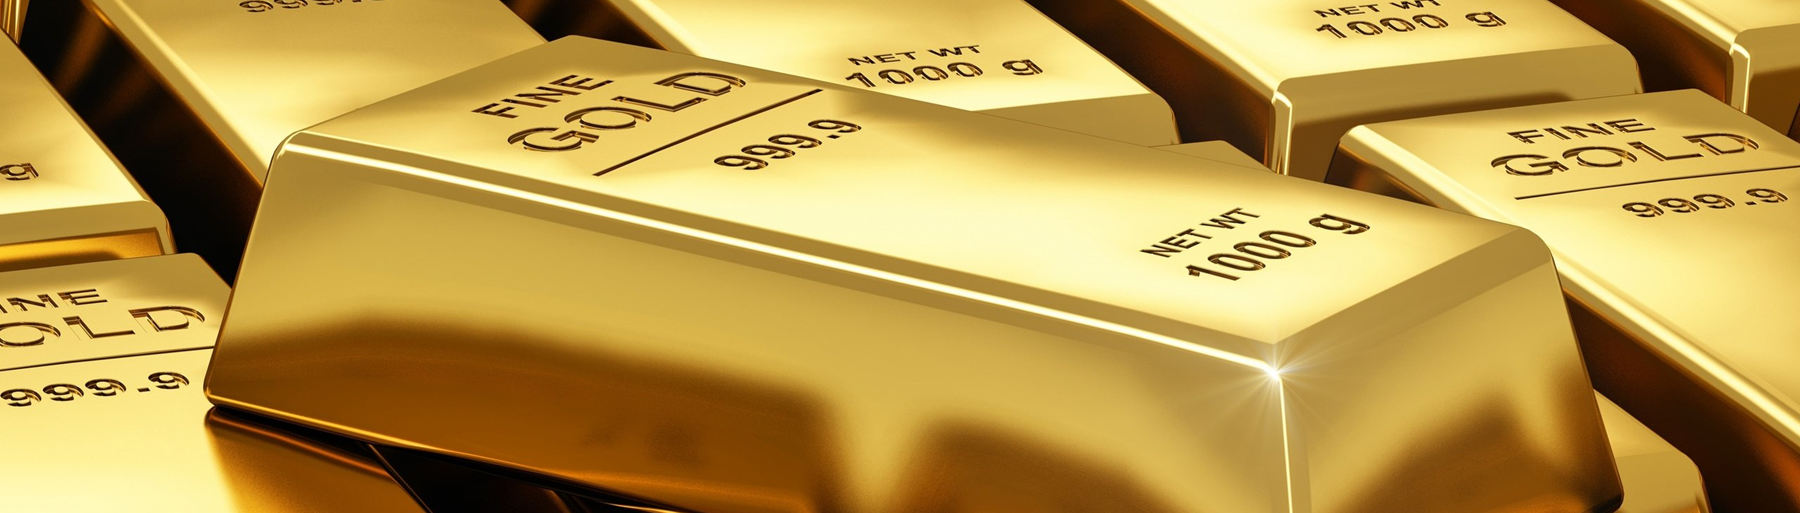

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler

In [ ]:
gold = pd.read_csv('gold.csv', index_col='Date', parse_dates = True)

In [ ]:
print(gold.shape)
gold.head(5)

(5703, 6)


Open   High    Low  Close  Volume Currency
Date                                                   
2000-01-04  289.5  289.5  280.0  283.7   21621      USD
2000-01-05  283.7  285.0  281.0  282.1   25448      USD
2000-01-06  281.6  282.8  280.2  282.4   19055      USD
2000-01-07  282.5  284.5  282.0  282.9   11266      USD
2000-01-10  282.4  283.9  281.8  282.7   30603      USD

In [ ]:
gold.Currency.nunique()

1

In [ ]:
gold = gold[['Close']]

In [ ]:
print(gold.shape)
gold.head()

(5703, 1)


Close
Date             
2000-01-04  283.7
2000-01-05  282.1
2000-01-06  282.4
2000-01-07  282.9
2000-01-10  282.7

In [ ]:
gold.isnull().sum()

Close    0
dtype: int64

In [ ]:
gold.describe()

Close
count  5703.000000
mean   1040.298282
std     518.524020
min     256.600000
25%     460.500000
50%    1188.700000
75%    1383.050000
max    2069.400000

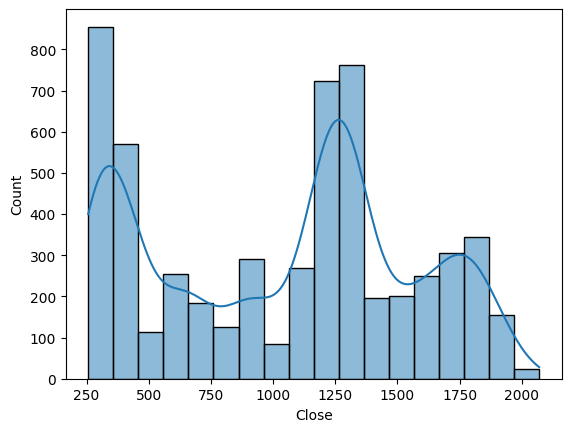

In [ ]:
sns.histplot(data=gold, x="Close", kde=True);

In [ ]:
gold.Close.loc['2020-09-07']

1943.2

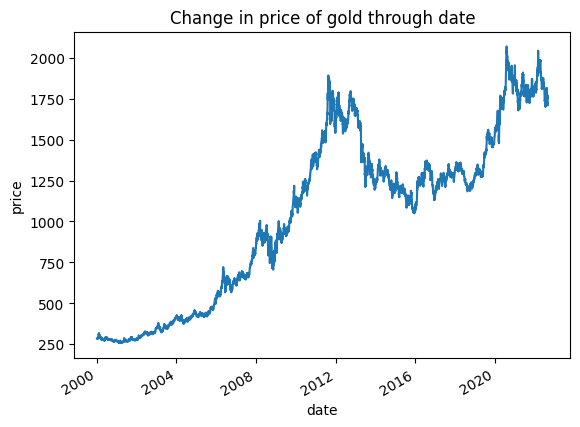

In [ ]:
gold['Close'].plot()
plt.title("Change in price of gold through date")
plt.xlabel("date")
plt.ylabel("price")
plt.show()

# Шок на рынке золота: коронавирус 2020

Рынок золота в период коронавируса проявил сильную волатильность.

---

В начале пандемии цена на золото резко выросла. Это связано с тем, что инвесторы ищут безопасные активы в периоды неопределенности и нестабильности на рынке. Золото считается одним из таких активов, так как оно сохраняет свою стоимость в любых условиях.

Кроме того, пандемия привела к снижению производства и экономической активности во многих странах,
что привело к сокращению спроса на активы, такие как акции и облигации. В этой ситуации инвесторы
переключили свое внимание на золото, что привело к росту его цены.

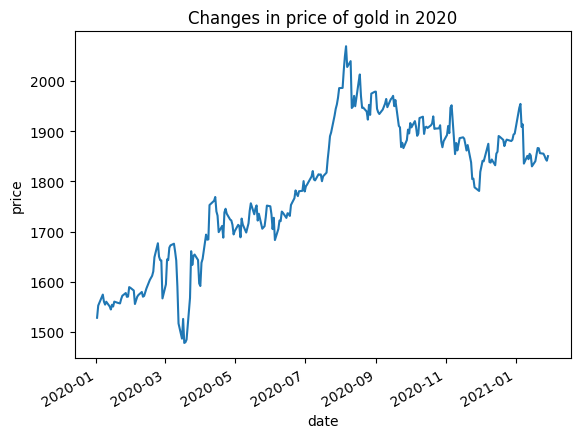

In [ ]:
gold.Close.loc['2020-01':'2021-01'].plot()
plt.title("Changes in price of gold in 2020")
plt.xlabel("date")
plt.ylabel("price")
plt.show()

In [ ]:
gold2020 = gold.loc['2020-01':'2021-01']
gold2020[gold2020.Close==gold2020.Close.max()]

Open    High     Low   Close  Volume
Date                                              
2020-08-06  2055.0  2081.8  2049.0  2069.4  312758

Цена на золото достигла самого высокого уровня 6 августа 2020 года, поднявшись до $2.069 долларов за
тройскую унцию

In [ ]:
gold2020 = gold.loc['2020-01':'2021-01']
gold2020[gold2020.Close==gold2020.Close.min()]

Open    High     Low   Close  Volume
Date                                              
2020-03-18  1527.6  1547.0  1473.3  1477.9  435187

 Несмотря на кратковременное снижение стоимости в середине марта, в первой половине
2020 года золото постоянно росло, поскольку инвесторы стремились к стабильности за пределами рынка
акций.

На положительную динамику цен на золото в пандемию повлияло несколько факторов:


*    Торговый конфликт между США и Китаем;

*   Нарушение цепочек поставок по всему миру;
*   Рост государственного долга США до беспрецедентно высокого уровня;


*   Нестабильность на рынке акций США;


*   Политические волнения и неопределенность в США;
*   Меры, принятые центральными банками по всему миру

(Снижение процентных ставок и программы
количественного смягчения могли повлиять на цену золота, так как они могли привести к инфляции и
уменьшению стоимости национальных валют)





# В поиске Тренда

In [ ]:
gold1 = gold.copy()
gold1.index = pd.to_datetime(gold1.index)
gold1.index[:5]

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
gold1 = gold1.loc['2000-01':'2011-01']
gold1 = gold1[['Close']]
gold1.shape

(2783, 1)

In [ ]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

<ipython-input-18-be95810f2c32>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


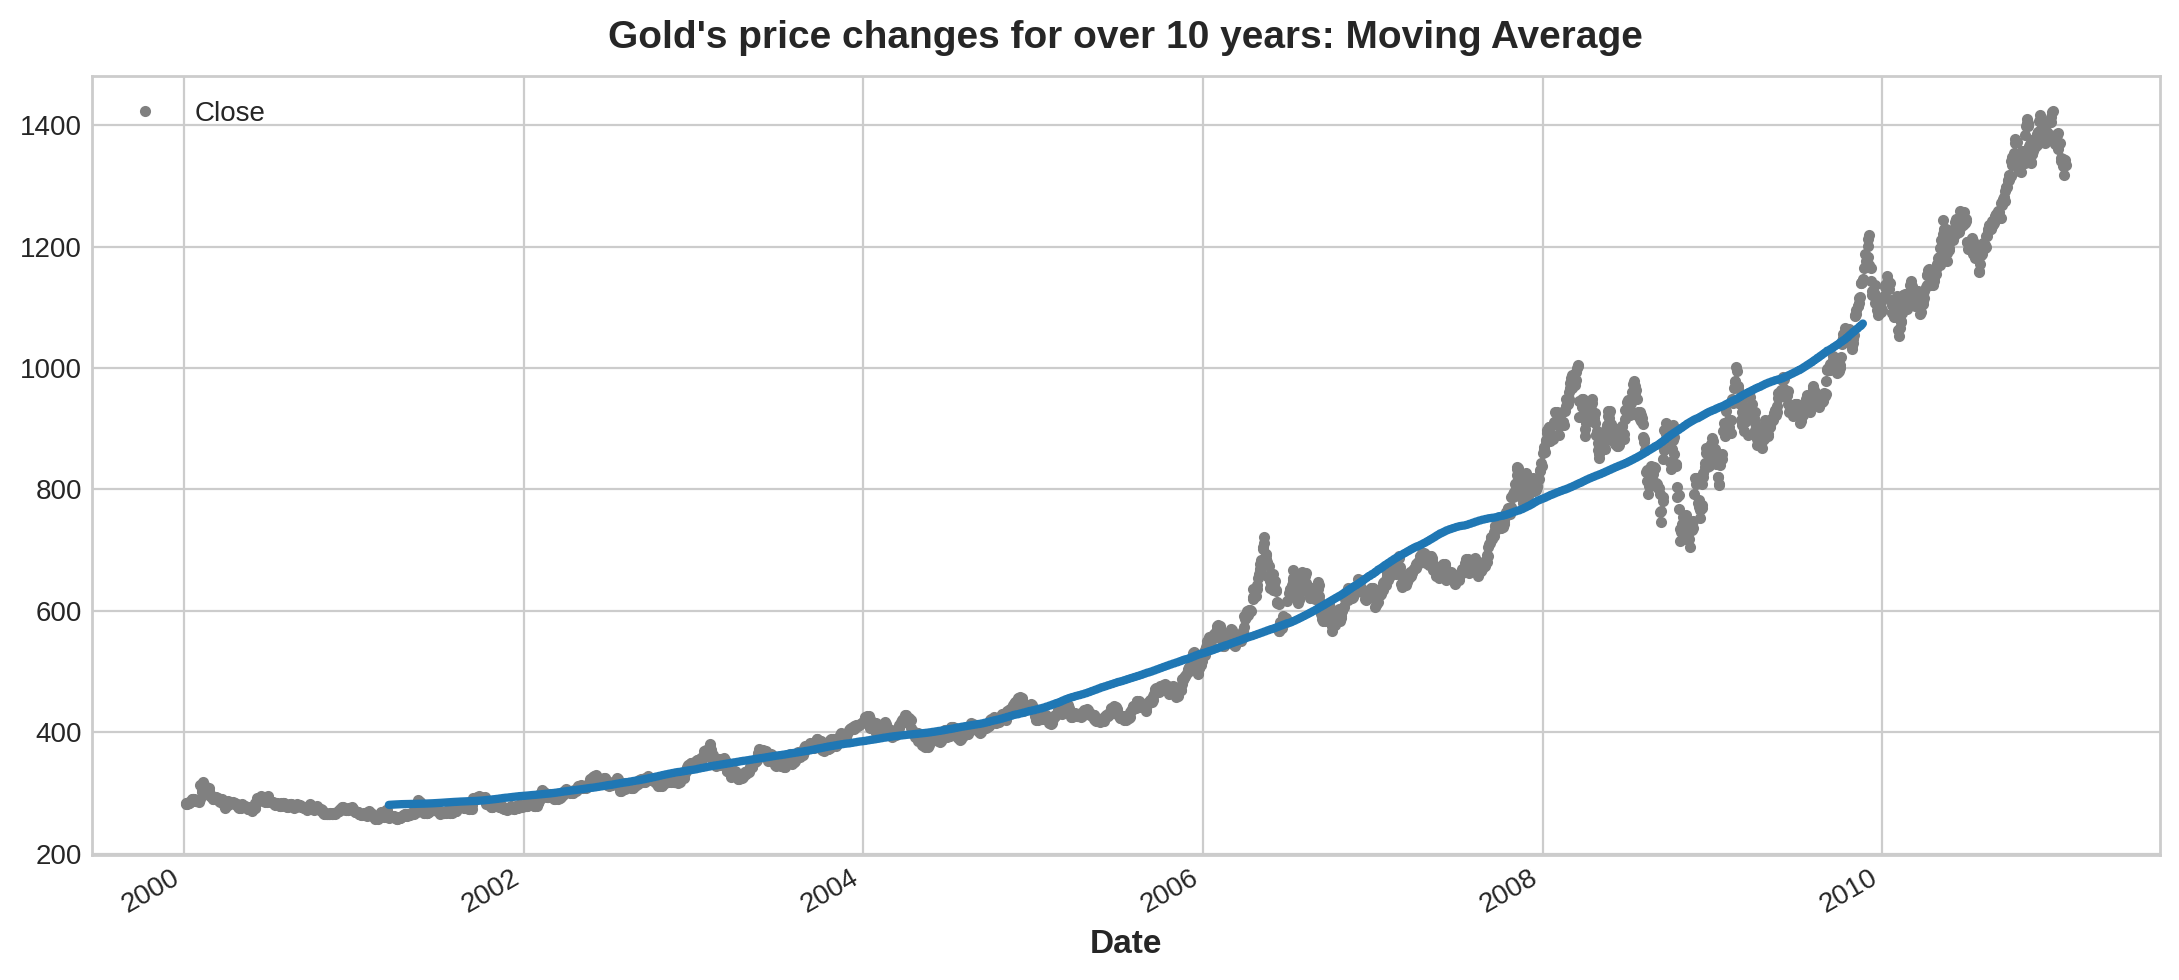

In [ ]:
moving_average = gold1.rolling(
    window=600,
    center=True,

).mean()

ax = gold1.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Gold's price changes for over 10 years: Moving Average", legend=False,
);

In [ ]:
gold2 = gold.copy()
gold2index = pd.to_datetime(gold2.index)
gold2 = gold2.loc['2000-01':'2022-01']
gold2 = gold2[['Close']]
gold2.shape

(5554, 1)

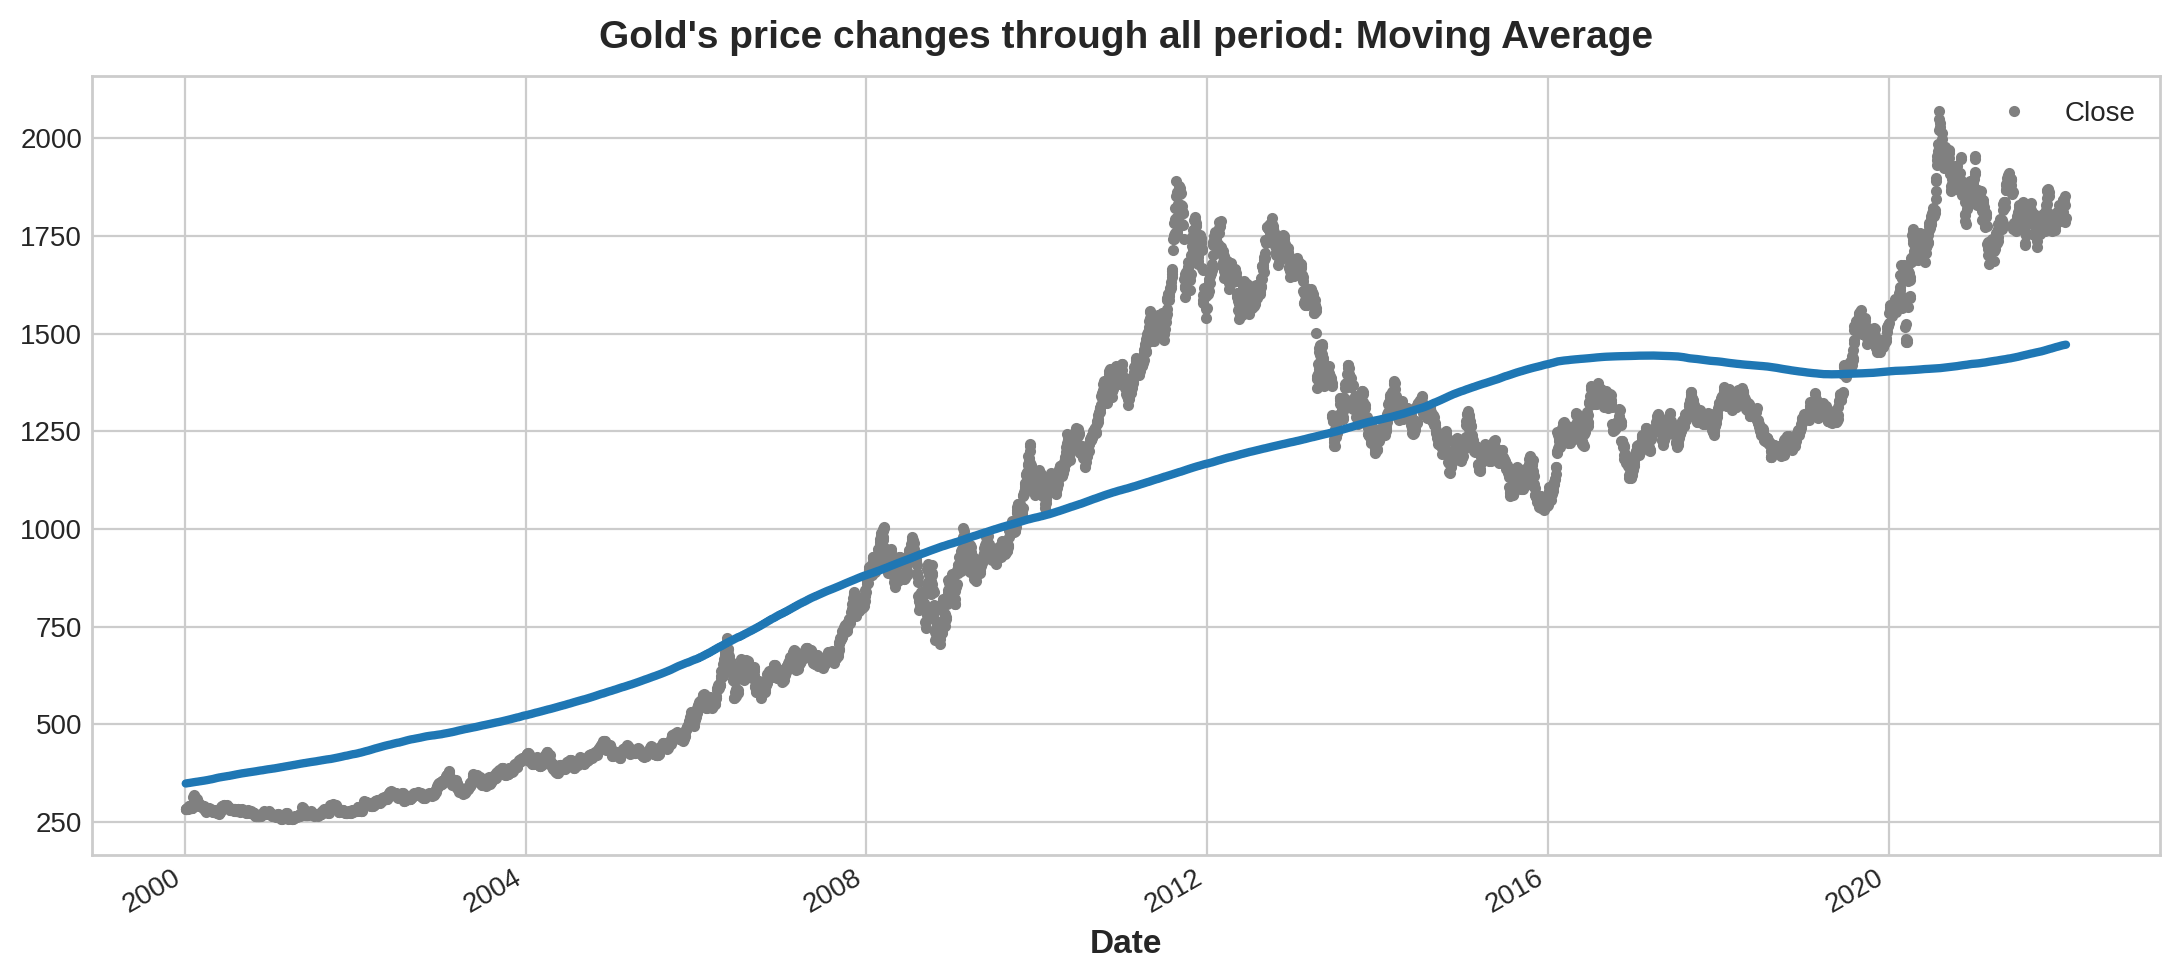

In [ ]:
moving_average = gold2.rolling(
    window=3000,
    center=True,
    min_periods=1500,
).mean()

ax = gold2.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Gold's price changes through all period: Moving Average", legend=False,
);

In [ ]:
time = gold.copy()
time['Time'] = np.arange(len(gold.index))             # Time Step

In [ ]:
time.head()

Open   High    Low  Close  Volume  Time
Date                                                
2000-01-04  289.5  289.5  280.0  283.7   21621     0
2000-01-05  283.7  285.0  281.0  282.1   25448     1
2000-01-06  281.6  282.8  280.2  282.4   19055     2
2000-01-07  282.5  284.5  282.0  282.9   11266     3
2000-01-10  282.4  283.9  281.8  282.7   30603     4

<ipython-input-120-b02db3333be8>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


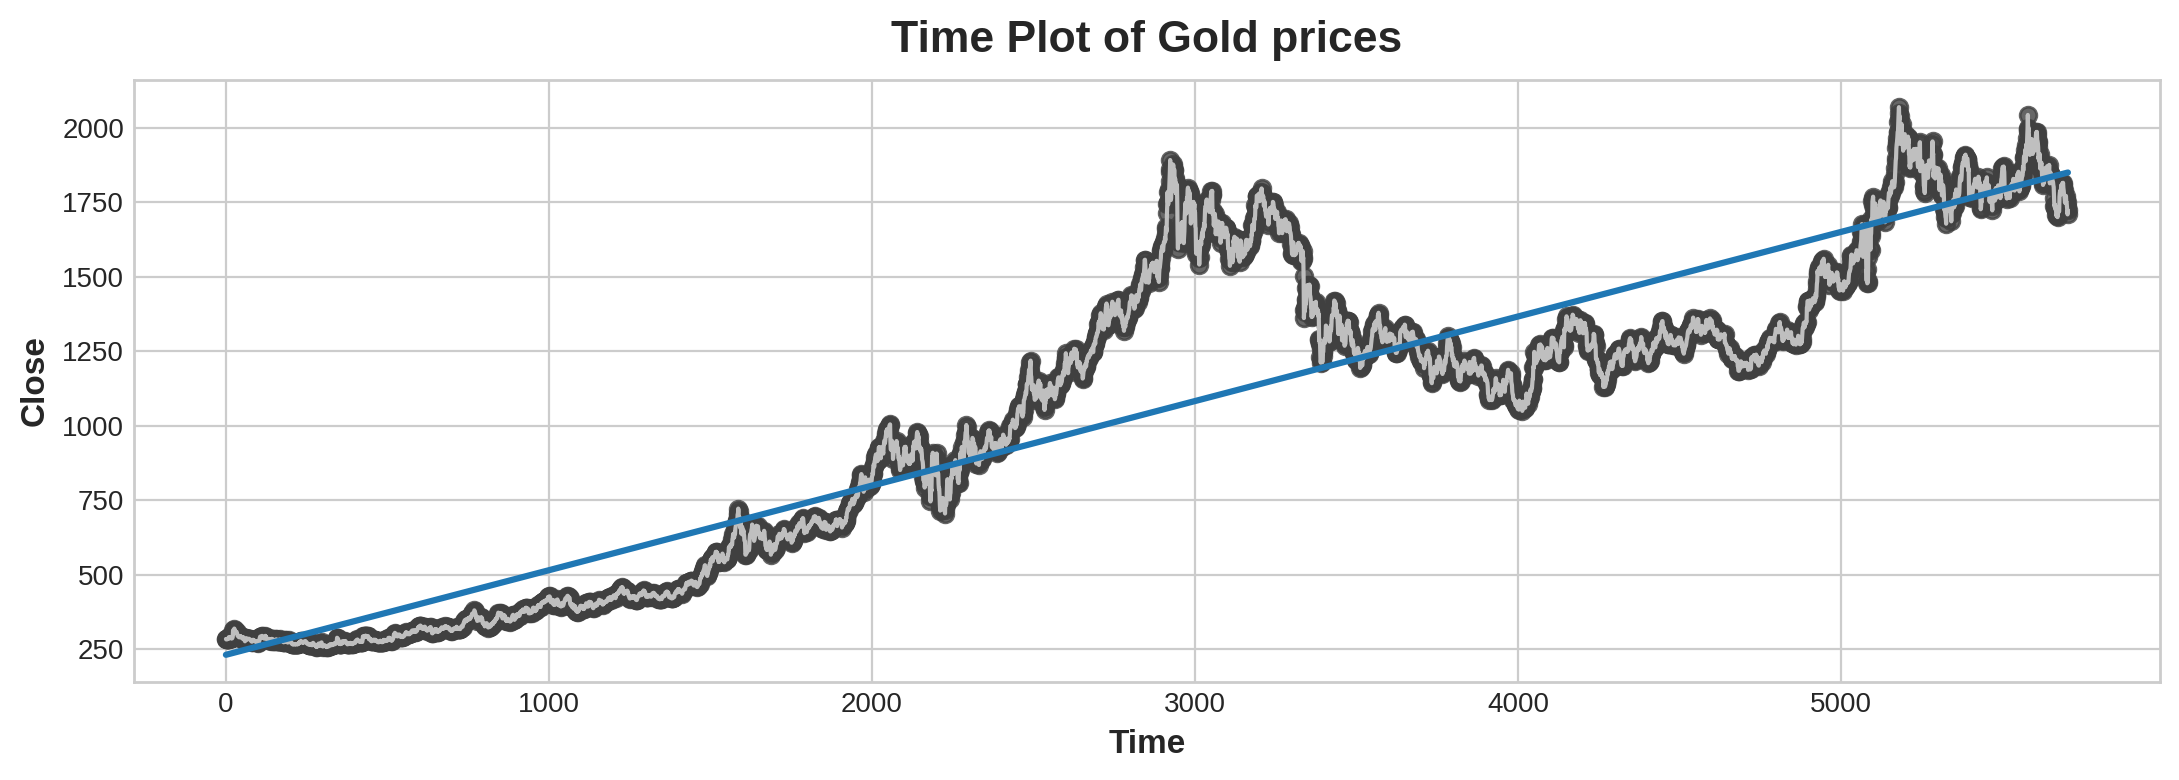

In [ ]:
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Close', data=time, color='0.75')
ax = sns.regplot(x='Time', y='Close', data=time, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Gold prices');

# ML: RandomForestRegressor, XGBoost

**RandomForestRegressor**

---






In [ ]:
gold1 = gold.copy()

Добавление лагов:

In [ ]:
for i in range(1,11):
  gold1[f'Close{i}'] = gold.Cl тоose.shift(i)

gold1 = gold1.dropna()

In [ ]:
gold1.head()

Close  Close1  Close2  Close3  Close4  Close5  Close6  Close7  \
Date                                                                        
2000-01-19  290.3   289.6   284.9   285.1   283.7   284.4   282.7   282.9   
2000-01-20  289.3   290.3   289.6   284.9   285.1   283.7   284.4   282.7   
2000-01-21  289.7   289.3   290.3   289.6   284.9   285.1   283.7   284.4   
2000-01-24  288.1   289.7   289.3   290.3   289.6   284.9   285.1   283.7   
2000-01-25  286.6   288.1   289.7   289.3   290.3   289.6   284.9   285.1   

            Close8  Close9  Close10  
Date                                 
2000-01-19   282.4   282.1    283.7  
2000-01-20   282.9   282.4    282.1  
2000-01-21   282.7   282.9    282.4  
2000-01-24   284.4   282.7    282.9  
2000-01-25   283.7   284.4    282.7

In [ ]:
X = gold1.drop(['Close'], axis=1)
y = gold1['Close']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [ ]:
param_grid = {'n_estimators': [50, 100, 200, 300, 400],
              'max_depth': [3, 10, 20, 30, 80]}

rf = RandomForestRegressor()


rf_grid_search = GridSearchCV(rf, param_grid, cv=2)

rf_grid_search.fit(X_train, y_train)

print('Best parameter values: ', rf_grid_search.best_params_)


Best parameter values:  {'max_depth': 10, 'n_estimators': 300}


Значимость признаков:

In [ ]:
rf=RandomForestRegressor(max_depth=10, n_estimators=300)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=300)

In [ ]:
importances_df = pd.DataFrame({"feature_names" : rf.feature_names_in_,
                               "importances" : rf.feature_importances_})
importances_df


feature_names  importances
0        Close1     0.985862
1        Close2     0.008844
2        Close3     0.003084
3        Close4     0.000245
4        Close5     0.000233
5        Close6     0.000224
6        Close7     0.000041
7        Close8     0.001394
8        Close9     0.000032
9       Close10     0.000040

Значимым признаком оказался Close1 (лаг 1):

In [ ]:
gold1=gold1[['Close','Close1']]
gold1.head()

Close  Close1
Date                     
2000-01-19  290.3   289.6
2000-01-20  289.3   290.3
2000-01-21  289.7   289.3
2000-01-24  288.1   289.7
2000-01-25  286.6   288.1

Что будет, если удалить Close1:значимость распределится равномерно по остальным признакам, или будет просто большое значение Close2?

In [ ]:
gold2 = gold1.drop(['Close1'],axis=1)
gold2.head()

Close  Close2  Close3  Close4  Close5  Close6  Close7  Close8  \
Date                                                                        
2000-01-19  290.3   284.9   285.1   283.7   284.4   282.7   282.9   282.4   
2000-01-20  289.3   289.6   284.9   285.1   283.7   284.4   282.7   282.9   
2000-01-21  289.7   290.3   289.6   284.9   285.1   283.7   284.4   282.7   
2000-01-24  288.1   289.3   290.3   289.6   284.9   285.1   283.7   284.4   
2000-01-25  286.6   289.7   289.3   290.3   289.6   284.9   285.1   283.7   

            Close9  Close10  
Date                         
2000-01-19   282.1    283.7  
2000-01-20   282.4    282.1  
2000-01-21   282.9    282.4  
2000-01-24   282.7    282.9  
2000-01-25   284.4    282.7

In [ ]:
X1 = gold2.drop(['Close'], axis=1)
y1 = gold2['Close']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size=0.1)

In [ ]:
rf=RandomForestRegressor(max_depth=10, n_estimators=300)
rf.fit(X_train1,y_train1)

RandomForestRegressor(max_depth=10, n_estimators=300)

In [ ]:
importances_df = pd.DataFrame({"feature_names" : rf.feature_names_in_,
                               "importances" : rf.feature_importances_})
importances_df


feature_names  importances
0        Close2     0.968815
1        Close3     0.023405
2        Close4     0.001791
3        Close5     0.000131
4        Close6     0.002705
5        Close7     0.002691
6        Close8     0.000083
7        Close9     0.000278
8       Close10     0.000102

In [ ]:
def test_size(n):
  X = gold1.drop(['Close'], axis=1)
  y = gold1['Close']
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=n,random_state=1)
  param_grid = {'n_estimators': [50, 100, 200, 300, 400],
              'max_depth': [3, 10, 20, 30, 80]}

  rf = RandomForestRegressor()
  rf_grid_search = GridSearchCV(rf, param_grid, cv=2)
  rf_grid_search.fit(X_train, y_train)
  rf_pred=rf_grid_search.predict(X_test)
  mse = mean_squared_error(X_test,y_test)
  return mse

Изменение ошибки в зависимости от test_size:

In [ ]:
for i in np.arange(0.1,0.22,0.02):
  print(test_size(i))

129.81754385964905
148.31586257309945
134.0296115288221
134.27063666300774
144.51143414634143


In [ ]:
X = gold1.drop(['Close'], axis=1)
y = gold1['Close']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=1)

In [ ]:
param_grid = {'n_estimators': [50, 100, 200, 300, 400],
              'max_depth': [3, 10, 20, 30, 80]}

rf = RandomForestRegressor()

rf_grid_search = GridSearchCV(rf, param_grid, cv=2)

rf_grid_search.fit(X_train, y_train)


print('Best parameter values: ', rf_grid_search.best_params_)


Best parameter values:  {'max_depth': 10, 'n_estimators': 50}


In [ ]:
rf_pred=rf_grid_search.predict(X_test)

In [ ]:
def report(model,X_test,y_test):
  mse = mean_squared_error(X_test,y_test)
  rmse = np.sqrt(mse)
  report = pd.DataFrame({'mse':mse,
                         'rmse':rmse},
                         index=[model])
  return report

In [ ]:
df = report('RandomForestRegressor',rf_pred,y_test)
df

mse       rmse
RandomForestRegressor  153.146912  12.375254

**XGBRegressor**

---



In [ ]:
gold2 = gold1.copy()
gold2.head()

Close  Close1  Close2  Close3  Close4  Close5  Close6  Close7  \
Date                                                                        
2000-01-19  290.3   289.6   284.9   285.1   283.7   284.4   282.7   282.9   
2000-01-20  289.3   290.3   289.6   284.9   285.1   283.7   284.4   282.7   
2000-01-21  289.7   289.3   290.3   289.6   284.9   285.1   283.7   284.4   
2000-01-24  288.1   289.7   289.3   290.3   289.6   284.9   285.1   283.7   
2000-01-25  286.6   288.1   289.7   289.3   290.3   289.6   284.9   285.1   

            Close8  Close9  Close10  
Date                                 
2000-01-19   282.4   282.1    283.7  
2000-01-20   282.9   282.4    282.1  
2000-01-21   282.7   282.9    282.4  
2000-01-24   284.4   282.7    282.9  
2000-01-25   283.7   284.4    282.7

In [ ]:
gold2 = gold2.loc['2020-01':'2022-09']

Окно ширины 60:

In [ ]:
gold2['window'] = gold2['Close'].rolling(window=60).mean()

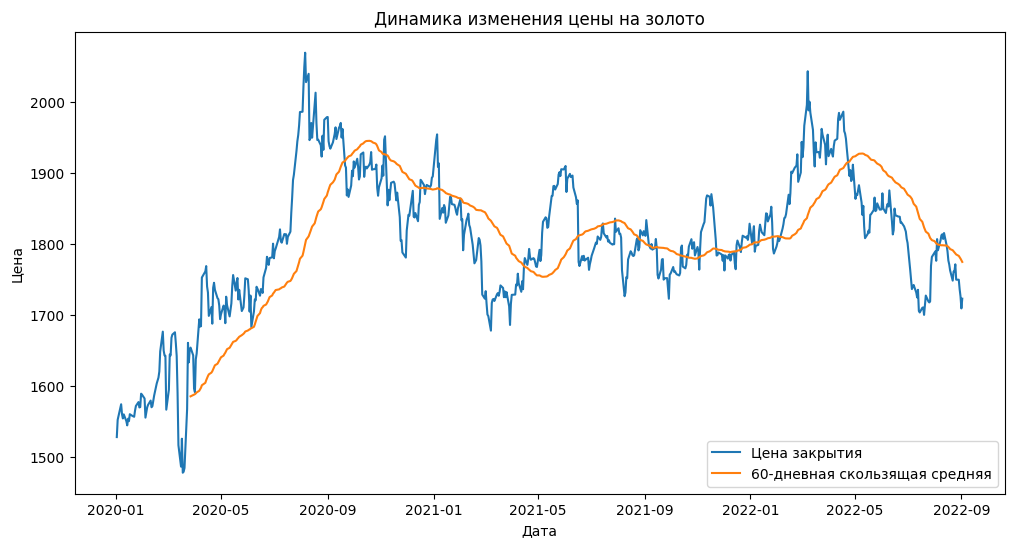

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(gold2["Close"], label="Цена закрытия")
plt.plot(gold2["window"], label="60-дневная скользящая средняя")
plt.title("Динамика изменения цены на золото")
plt.xlabel("Дата")
plt.ylabel("Цена")
plt.legend()
plt.show()

In [ ]:
pargrid={"learning_rate": (0.05, 0.1, 0.01,0.001,0.3),
            "max_depth": [ 3, 5, 10, 20, 30, 50],
            "min_child_weight": [ 1, 3, 5, 7],
            "gamma":[ 0.0, 0.1, 0.2, 0.5, 0.7]}

xgb = XGBRegressor()
xgb_search = GridSearchCV(xgb, pargrid, cv=2, verbose=0)
xgb_search.fit(X_train,y_train)

print('Best parameter values: ', xgb_search.best_params_)

Best parameter values:  {'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5}


In [ ]:
xgb_pred = xgb_search.predict(X_test)

In [ ]:
df2 = pd.concat([df,report('XGBRegressor',xgb_pred,y_test)])

In [ ]:
df2

mse       rmse
RandomForestRegressor  153.146912  12.375254
XGBRegressor           161.534365  12.709617

In [ ]:
gold2 = gold1.copy()
gold2.head()

Close  Close1  Close2  Close3  Close4  Close5  Close6  Close7  \
Date                                                                        
2000-01-19  290.3   289.6   284.9   285.1   283.7   284.4   282.7   282.9   
2000-01-20  289.3   290.3   289.6   284.9   285.1   283.7   284.4   282.7   
2000-01-21  289.7   289.3   290.3   289.6   284.9   285.1   283.7   284.4   
2000-01-24  288.1   289.7   289.3   290.3   289.6   284.9   285.1   283.7   
2000-01-25  286.6   288.1   289.7   289.3   290.3   289.6   284.9   285.1   

            Close8  Close9  Close10  
Date                                 
2000-01-19   282.4   282.1    283.7  
2000-01-20   282.9   282.4    282.1  
2000-01-21   282.7   282.9    282.4  
2000-01-24   284.4   282.7    282.9  
2000-01-25   283.7   284.4    282.7

In [ ]:
gold2['Close'] = gold2['Close'].rolling(window=60).mean()
gold2 = gold2[['Close','Close1']]

In [ ]:
X = gold2.drop(['Close'], axis=1)
y = gold2['Close']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=1)




In [ ]:
pargrid={"learning_rate": (0.05, 0.1, 0.01,0.001,0.3),
            "max_depth": [ 3, 5, 10, 20, 30, 50],
            "min_child_weight": [ 1, 3, 5, 7],
            "gamma":[ 0.0, 0.1, 0.2, 0.5, 0.7]}

xgb = XGBRegressor()
xgb_search = GridSearchCV(xgb, pargrid, cv=2, verbose=0)
xgb_search.fit(X_train,y_train)

xgb_pred1 = xgb_search.predict(X_test)

pd.concat([df2,report('XGBRegressor',xgb_pred1,y_test)])

# Экскурс в историю: как строили предсказания раньше?

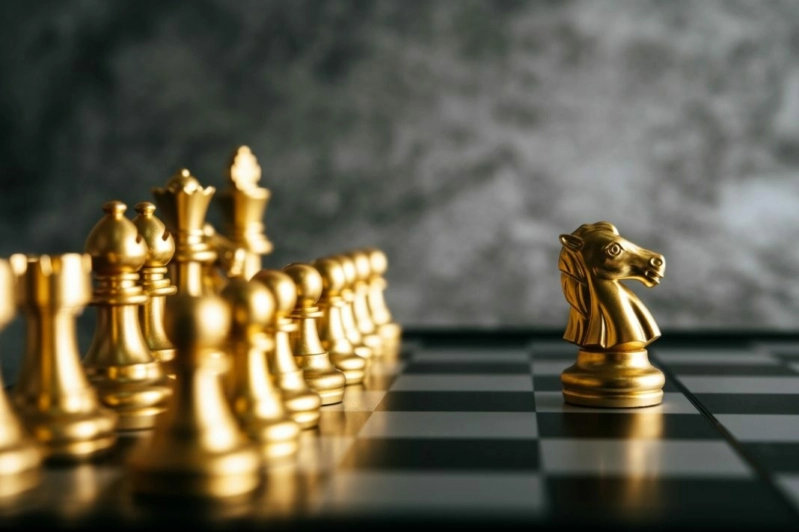

Ценность золота заключается в его высокой ковкости и гибкости, его трудно сломать или
растянуть. Кроме этого, золото – довольно красивый металл. Он используется в огромном
количестве ювелирных изделий любых размеров и форм

---



Существует несколько методов, которые могут помочь в прогнозировании цены на золото:



*   Анализ фундаментальных факторов: изучение экономических и политических событий, которые
могут повлиять на спрос и предложение на рынке золота
*   Технический анализ: изучение графиков цен на золото и использование различных индикаторов
для определения тренда и возможных точек входа и выхода из рынка


*   Представление о том, какие факторы могут повлиять на цену золота в будущем






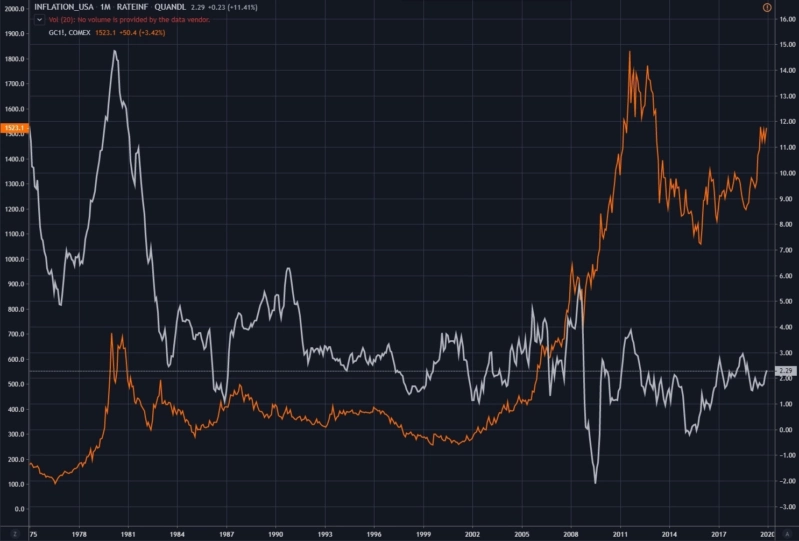

*Факторы, оказывающие влияние на цену золота:*



1.    **Инфляция**: Цена на золото обычно растет в периоды высокой инфляции, так как золото
считается защитным активом, который может сохранить свою стоимость в условиях роста цен.
2.   **Спрос на ювелирные изделия**: Цена на золото также зависит от спроса на ювелирные изделия,
так как большая часть золота используется для производства украшений.
3.  **Геополитические события**: Нестабильность в мировой политике и конфликты могут привести к
росту цены на золото, так как инвесторы ищут защиту в безопасных активах.
4. **Доллар США**: Цена на золото обычно обратно пропорциональна курсу доллара США. Если
доллар укрепляется, то цена на золото снижается, и наоборот.
5.  **Центральные банки**: Покупки и продажи золота центральными банками могут также влиять на
цену золота. Объем покупки золота центральными банками оказывает поддержку цене
драгметалла. Как группа они являются чистыми покупателями уже более десяти лет и закончили
2021 год с самыми высокими запасами золота за 31 год.
6.  **Уязвимые фондовые рынки**: С исторической точки зрения, когда акции слабы, золото, как
правило, сильно.



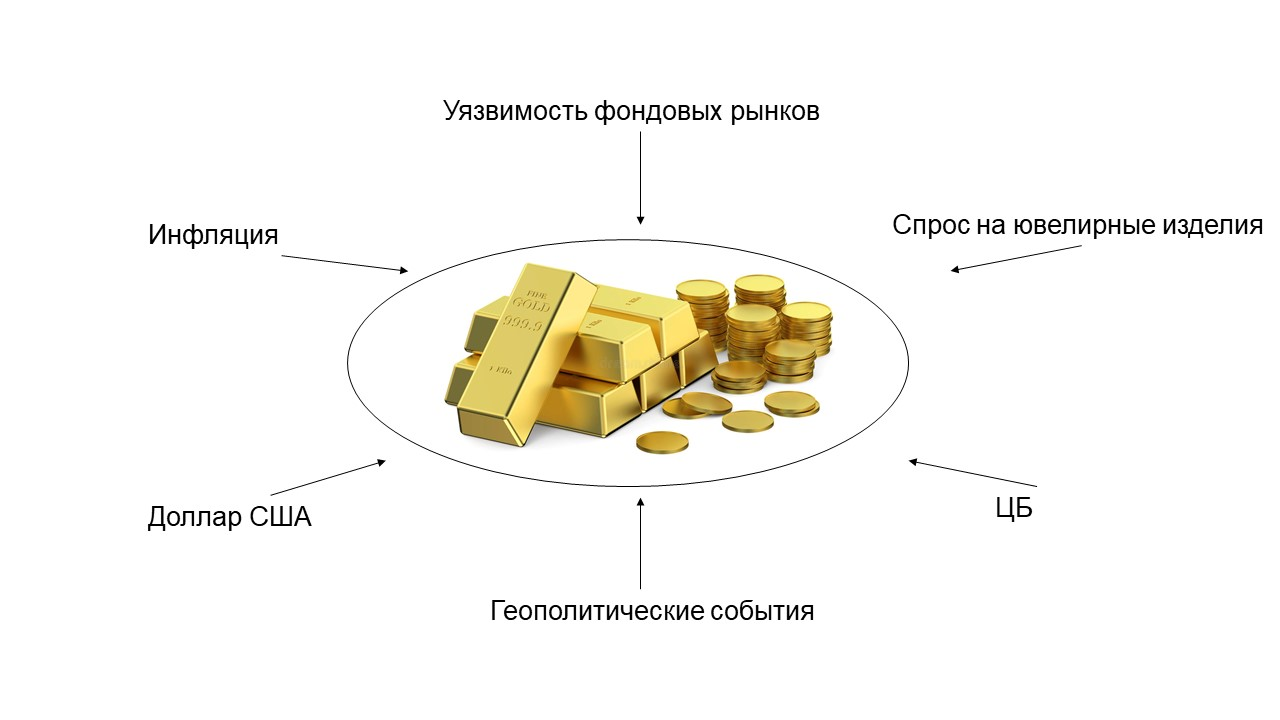

# Neural Network: LSTM (using window)

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable

In [ ]:
num_shape = 5132

In [ ]:
gold1.head()

Close  Close1
Date                     
2000-01-19  290.3   289.6
2000-01-20  289.3   290.3
2000-01-21  289.7   289.3
2000-01-24  288.1   289.7
2000-01-25  286.6   288.1

In [ ]:
train = (gold1['Close1'].iloc[:num_shape].values).reshape(-1, 1)
test = (gold1['Close1'].iloc[num_shape:].values).reshape(-1, 1)

Нормализация данных:

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
train_scaler = scaler.fit_transform(train)
test_scaler = scaler.transform(test)

In [ ]:
train_scaler

array([[0.02017978],
       [0.02060784],
       [0.01999633],
       ...,
       [0.89604354],
       [0.89530973],
       [0.90698954]])

In [ ]:
X_train = []
y_train = []

window = 60
for i in range(window, num_shape):
  X_train_window = np.reshape(train_scaler[i-window:i,0], (window,1))
  X_train.append(X_train_window)
  y_train.append(train_scaler[i,0])
X_train = np.stack(X_train)
y_train = np.stack(y_train)

In [ ]:
X_train

array([[[0.02017978],
        [0.02060784],
        [0.01999633],
        ...,
        [0.01583807],
        [0.01675534],
        [0.01657188]],

       [[0.02060784],
        [0.01999633],
        [0.02024093],
        ...,
        [0.01675534],
        [0.01657188],
        [0.01644958]],

       [[0.01999633],
        [0.02024093],
        [0.01926252],
        ...,
        [0.01657188],
        [0.01644958],
        [0.01626613]],

       ...,

       [[0.77056198],
        [0.75209442],
        [0.7761267 ],
        ...,
        [0.89940684],
        [0.87225586],
        [0.8857702 ]],

       [[0.75209442],
        [0.7761267 ],
        [0.74683544],
        ...,
        [0.87225586],
        [0.8857702 ],
        [0.89604354]],

       [[0.7761267 ],
        [0.74683544],
        [0.74769156],
        ...,
        [0.8857702 ],
        [0.89604354],
        [0.89530973]]])

In [ ]:
class LSTM(nn.Module):

  def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
    super().__init__()
    self.hidden_dim = hidden_dim
    self.layer_dim = layer_dim
    self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
    self.fc = nn.Linear(hidden_dim, output_dim)


  def forward(self, x):
    h0, c0 = self.init_hidden(x)
    out, (hn, cn) = self.rnn(x, (h0, c0))
    out = self.fc(out[:, -1, :])
    return out

  def init_hidden(self, x):
    h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim)
    c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim)
    return [t.cuda() for t in (h0, c0)]


In [ ]:
(X_train.shape[1])

60

In [ ]:
input_dim = (X_train.shape[1])
hidden_dim = 64
layer_dim = 1
output_dim = 1
learning_rate = 0.01

model = LSTM(input_dim, hidden_dim, layer_dim, output_dim)
model.cuda()

LSTM(
  (lstm): LSTM(60, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [ ]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
train = gold1.iloc[:,0:1]

In [ ]:
def window(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)


training_data = scaler.fit_transform(train)

seq_length = 10
x, y = window(training_data, seq_length)

train_size = num_shape
test_size = train.size - num_shape

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

X_train = Variable(torch.Tensor(np.array(x[:train_size])))
y_train = Variable(torch.Tensor(np.array(y[:train_size])))

X_test = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
y_test = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTM, self).__init__()

        self.hidden_dim = hidden_dim

        self.layer_dim = layer_dim

        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)

        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):

        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
learning_rate = 0.01
num_epochs = 20

In [ ]:
model = LSTM(input_dim, hidden_dim, layer_dim, output_dim)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(num_epochs):
    outputs = model(X_train)
    optimizer.zero_grad()

    # obtain the loss function
    loss = criterion(outputs, y_train)

    loss.backward()

    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

# LSTM

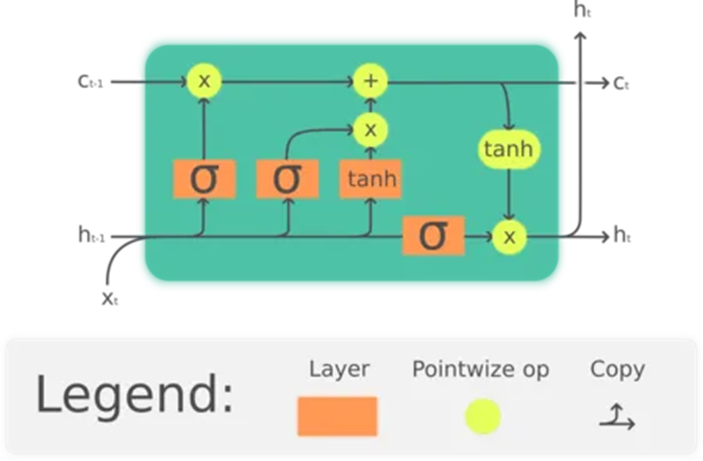

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
from torch.utils.data import Dataset

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
gold1_np = gold1.to_numpy()
gold1_np

array([[ 290.3,  289.6],
       [ 289.3,  290.3],
       [ 289.7,  289.3],
       ...,
       [1726.2, 1736.3],
       [1709.3, 1726.2],
       [1723. , 1709.3]])

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
gold1_np = scaler.fit_transform(gold1_np)

In [ ]:
gold1_np

array([[-0.96281995, -0.96359223],
       [-0.96392321, -0.96281995],
       [-0.96348191, -0.96392321],
       ...,
       [ 0.62135922,  0.63250221],
       [ 0.60271403,  0.62135922],
       [ 0.61782877,  0.60271403]])

In [ ]:
X = gold1_np[:,1]
y = gold1_np[:,0]



((5693,), (5693,))

In [ ]:
X_train = X[:num_shape]
X_test = X[num_shape:]

y_train = y[:num_shape]
y_test = y[num_shape:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5132,), (561,), (5132,), (561,))

In [ ]:
X_train = X_train.reshape((-1, 1, 1))            # 1 - количество лагов, которое добавили выше (gold.Close.shift(1))
X_test = X_test.reshape((-1, 1, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5132, 1, 1), (561, 1, 1), (5132, 1), (561, 1))

In [ ]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([5132, 1, 1]),
 torch.Size([561, 1, 1]),
 torch.Size([5132, 1]),
 torch.Size([561, 1]))

In [ ]:
class TimeDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeDataset(X_train, y_train)
test_dataset = TimeDataset(X_test, y_test)

In [ ]:
batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out



In [ ]:
model = LSTM(1, 2, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 2, batch_first=True)
  (fc): Linear(in_features=2, out_features=1, bias=True)
)

In [ ]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # каждые 100 бачей
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [ ]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('---------------------------------------------')
    print()

In [ ]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.869
Batch 200, Loss: 0.656
Batch 300, Loss: 0.393

Val Loss: 0.297
---------------------------------------------

Epoch: 2
Batch 100, Loss: 0.234
Batch 200, Loss: 0.163
Batch 300, Loss: 0.115

Val Loss: 0.162
---------------------------------------------

Epoch: 3
Batch 100, Loss: 0.067
Batch 200, Loss: 0.038
Batch 300, Loss: 0.019

Val Loss: 0.016
---------------------------------------------

Epoch: 4
Batch 100, Loss: 0.009
Batch 200, Loss: 0.006
Batch 300, Loss: 0.004

Val Loss: 0.005
---------------------------------------------

Epoch: 5
Batch 100, Loss: 0.003
Batch 200, Loss: 0.003
Batch 300, Loss: 0.003

Val Loss: 0.006
---------------------------------------------

Epoch: 6
Batch 100, Loss: 0.002
Batch 200, Loss: 0.002
Batch 300, Loss: 0.002

Val Loss: 0.009
---------------------------------------------

Epoch: 7
Batch 100, Loss: 0.002
Batch 200, Loss: 0.002
Batch 300, Loss: 0.002

Val Loss: 0.011
---------------------------------------------

Epoch:

# LSTM - FC (ReLU)

In [ ]:
gold1.head()

Close  Close1  Close2  Close3  Close4  Close5  Close6  Close7  \
Date                                                                        
2000-01-19  290.3   289.6   284.9   285.1   283.7   284.4   282.7   282.9   
2000-01-20  289.3   290.3   289.6   284.9   285.1   283.7   284.4   282.7   
2000-01-21  289.7   289.3   290.3   289.6   284.9   285.1   283.7   284.4   
2000-01-24  288.1   289.7   289.3   290.3   289.6   284.9   285.1   283.7   
2000-01-25  286.6   288.1   289.7   289.3   290.3   289.6   284.9   285.1   

            Close8  Close9  Close10  
Date                                 
2000-01-19   282.4   282.1    283.7  
2000-01-20   282.9   282.4    282.1  
2000-01-21   282.7   282.9    282.4  
2000-01-24   284.4   282.7    282.9  
2000-01-25   283.7   284.4    282.7

In [ ]:
X = gold1.iloc[:,1:11]
y = gold1.iloc[:,0:1]

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_st = scaler.fit_transform(X)
y_st = scaler.fit_transform(y)

In [ ]:
num_shape = 5132

In [ ]:
X_train = X_st[:num_shape,:]
X_test = X_st[num_shape:,:]

y_train = y_st[:num_shape,:]
y_test = y_st[num_shape:,:]

In [ ]:
X_train_tens = Variable(torch.Tensor(X_train))
X_test_tens = Variable(torch.Tensor(X_test))

y_train_tens = Variable(torch.Tensor(y_train))
y_test_tens = Variable(torch.Tensor(y_test))

In [ ]:
X_training = torch.reshape(X_train_tens,   (X_train_tens.shape[0], 1, X_train_tens.shape[1]))

X_testing = torch.reshape(X_test_tens,  (X_test_tens.shape[0], 1, X_test_tens.shape[1]))


In [ ]:
class LSTM(nn.Module):
    def __init__(self, output_size, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        self.output_size = output_size
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True)

        self.fc = nn.Linear(hidden_size, output_size)

        self.relu = nn.ReLU()

    def forward(self, x):

        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
num_epochs = 150
learning_rate = 0.001

input_size = 10
hidden_size = 2
num_layers = 1
output_size = 1


In [ ]:
lstm1 = LSTM(output_size, input_size, hidden_size, num_layers)

In [ ]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate)

In [ ]:
#num_epochs = 1000
for epoch in range(num_epochs):
  outputs = lstm1.forward(X_training)
  optimizer.zero_grad()


  loss = criterion(outputs, y_train_tens)

  loss.backward()

  optimizer.step()
  if epoch % 1 == 0:
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.66704
Epoch: 1, loss: 0.66382
Epoch: 2, loss: 0.66059
Epoch: 3, loss: 0.65735
Epoch: 4, loss: 0.65411
Epoch: 5, loss: 0.65086
Epoch: 6, loss: 0.64761
Epoch: 7, loss: 0.64435
Epoch: 8, loss: 0.64108
Epoch: 9, loss: 0.63781
Epoch: 10, loss: 0.63453
Epoch: 11, loss: 0.63125
Epoch: 12, loss: 0.62796
Epoch: 13, loss: 0.62467
Epoch: 14, loss: 0.62138
Epoch: 15, loss: 0.61808
Epoch: 16, loss: 0.61478
Epoch: 17, loss: 0.61147
Epoch: 18, loss: 0.60816
Epoch: 19, loss: 0.60485
Epoch: 20, loss: 0.60153
Epoch: 21, loss: 0.59821
Epoch: 22, loss: 0.59489
Epoch: 23, loss: 0.59157
Epoch: 24, loss: 0.58824
Epoch: 25, loss: 0.58492
Epoch: 26, loss: 0.58159
Epoch: 27, loss: 0.57826
Epoch: 28, loss: 0.57494
Epoch: 29, loss: 0.57161
Epoch: 30, loss: 0.56828
Epoch: 31, loss: 0.56495
Epoch: 32, loss: 0.56162
Epoch: 33, loss: 0.55829
Epoch: 34, loss: 0.55497
Epoch: 35, loss: 0.55164
Epoch: 36, loss: 0.54832
Epoch: 37, loss: 0.54500
Epoch: 38, loss: 0.54168
Epoch: 39, loss: 0.53837
Epoch: 40,

In [ ]:
d1 = pd.DataFrame({'mse': [0.23890],
              'rmse':[0.48877]},

              index = ['LSTM-FC']
              )

# LSTM - FC1 (64)ReLU - FC2

In [ ]:
class LSTM(nn.Module):
    def __init__(self, output_size, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        self.output_size = output_size
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True)

        self.fc1 = nn.Linear(hidden_size, 64)
        self.fc = nn.Linear(64, output_size)

        self.relu = nn.ReLU()

    def forward(self, x):

        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out


In [ ]:
num_epochs = 150
learning_rate = 0.001

input_size = 10
hidden_size = 2
num_layers = 1
output_size = 1


In [ ]:
lstm2 = LSTM(output_size, input_size, hidden_size, num_layers)

In [ ]:
for epoch in range(num_epochs):
  outputs = lstm1.forward(X_training)
  optimizer.zero_grad()


  loss = criterion(outputs, y_train_tens)

  loss.backward()

  optimizer.step()
  if epoch % 1 == 0:
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.00044
Epoch: 1, loss: 0.00044
Epoch: 2, loss: 0.00044
Epoch: 3, loss: 0.00044
Epoch: 4, loss: 0.00044
Epoch: 5, loss: 0.00044
Epoch: 6, loss: 0.00044
Epoch: 7, loss: 0.00044
Epoch: 8, loss: 0.00044
Epoch: 9, loss: 0.00044
Epoch: 10, loss: 0.00044
Epoch: 11, loss: 0.00044
Epoch: 12, loss: 0.00044
Epoch: 13, loss: 0.00044
Epoch: 14, loss: 0.00044
Epoch: 15, loss: 0.00044
Epoch: 16, loss: 0.00044
Epoch: 17, loss: 0.00044
Epoch: 18, loss: 0.00044
Epoch: 19, loss: 0.00044
Epoch: 20, loss: 0.00044
Epoch: 21, loss: 0.00044
Epoch: 22, loss: 0.00044
Epoch: 23, loss: 0.00044
Epoch: 24, loss: 0.00044
Epoch: 25, loss: 0.00044
Epoch: 26, loss: 0.00044
Epoch: 27, loss: 0.00043
Epoch: 28, loss: 0.00043
Epoch: 29, loss: 0.00043
Epoch: 30, loss: 0.00043
Epoch: 31, loss: 0.00043
Epoch: 32, loss: 0.00043
Epoch: 33, loss: 0.00043
Epoch: 34, loss: 0.00043
Epoch: 35, loss: 0.00043
Epoch: 36, loss: 0.00043
Epoch: 37, loss: 0.00043
Epoch: 38, loss: 0.00043
Epoch: 39, loss: 0.00043
Epoch: 40,

In [ ]:
d2 = pd.DataFrame({'mse': [0.00042],
              'rmse':[0.02049]},

              index = ['LSTM-FC-FC']
              )

# LSTM(batch)

In [ ]:
gold1.head()

Close  Close1  Close2  Close3  Close4  Close5  Close6  Close7  \
Date                                                                        
2000-01-19  290.3   289.6   284.9   285.1   283.7   284.4   282.7   282.9   
2000-01-20  289.3   290.3   289.6   284.9   285.1   283.7   284.4   282.7   
2000-01-21  289.7   289.3   290.3   289.6   284.9   285.1   283.7   284.4   
2000-01-24  288.1   289.7   289.3   290.3   289.6   284.9   285.1   283.7   
2000-01-25  286.6   288.1   289.7   289.3   290.3   289.6   284.9   285.1   

            Close8  Close9  Close10  
Date                                 
2000-01-19   282.4   282.1    283.7  
2000-01-20   282.9   282.4    282.1  
2000-01-21   282.7   282.9    282.4  
2000-01-24   284.4   282.7    282.9  
2000-01-25   283.7   284.4    282.7

In [ ]:
gold2 = gold1.to_numpy()

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
gold2 = scaler.fit_transform(gold2)

In [ ]:
gold2

array([[-0.96281995, -0.96359223, -0.96877758, ..., -0.97153575,
        -0.97186673, -0.9701015 ],
       [-0.96392321, -0.96281995, -0.96359223, ..., -0.97098411,
        -0.97153575, -0.97186673],
       [-0.96348191, -0.96392321, -0.96281995, ..., -0.97120477,
        -0.97098411, -0.97153575],
       ...,
       [ 0.62135922,  0.63250221,  0.64728597, ...,  0.66184907,
         0.67100618,  0.67707414],
       [ 0.60271403,  0.62135922,  0.63250221, ...,  0.64585172,
         0.66184907,  0.67100618],
       [ 0.61782877,  0.60271403,  0.62135922, ...,  0.65997352,
         0.64585172,  0.66184907]])

In [ ]:
X = gold2[:,1:]
y = gold2[:,0]

In [ ]:
X.shape, y.shape

((5693, 10), (5693,))

In [ ]:
number = int(len(X)*0.95)
number

5408

In [ ]:
X_train = X[:number]
X_test = X[number:]

y_train = y[:number]
y_test = y[number:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5408, 10), (285, 10), (5408,), (285,))

In [ ]:
X_train = X_train.reshape((-1,10,1))
X_test = X_test.reshape((-1,10,1))

y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5408, 10, 1), (285, 10, 1), (5408, 1), (285, 1))

In [ ]:
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()

y_train = torch.tensor(y_train).float()
y_test = torch.tensor(y_test).float()

In [ ]:
class TimeDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeDataset(X_train, y_train)
test_dataset = TimeDataset(X_test, y_test)

In [ ]:
batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
for _, batch in enumerate(train_loader):
  x_batch, y_batch = batch[0], batch[1]
  print(x_batch.shape,y_batch.shape)
  break

torch.Size([16, 10, 1]) torch.Size([16, 1])


In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
model = LSTM(1,4,1)

In [ ]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0], batch[1]

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # каждые 100 бачей
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [ ]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('---------------------------------------------')
    print()

In [ ]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.307
Batch 200, Loss: 0.160
Batch 300, Loss: 0.034

Val Loss: 0.054
---------------------------------------------

Epoch: 2
Batch 100, Loss: 0.010
Batch 200, Loss: 0.008
Batch 300, Loss: 0.005

Val Loss: 0.014
---------------------------------------------

Epoch: 3
Batch 100, Loss: 0.003
Batch 200, Loss: 0.002
Batch 300, Loss: 0.002

Val Loss: 0.005
---------------------------------------------

Epoch: 4
Batch 100, Loss: 0.002
Batch 200, Loss: 0.002
Batch 300, Loss: 0.001

Val Loss: 0.003
---------------------------------------------

Epoch: 5
Batch 100, Loss: 0.001
Batch 200, Loss: 0.001
Batch 300, Loss: 0.001

Val Loss: 0.002
---------------------------------------------

Epoch: 6
Batch 100, Loss: 0.001
Batch 200, Loss: 0.002
Batch 300, Loss: 0.001

Val Loss: 0.003
---------------------------------------------

Epoch: 7
Batch 100, Loss: 0.001
Batch 200, Loss: 0.001
Batch 300, Loss: 0.001

Val Loss: 0.002
---------------------------------------------

Epoch:

In [ ]:
d3=pd.DataFrame({'mse': [0.002],
              'rmse':[0.04472]},

              index = ['LSTM(batch)']
              )

In [ ]:
d = pd.concat([d1,d2,d3])
d

mse     rmse
LSTM-FC      0.23890  0.48877
LSTM-FC-FC   0.00042  0.02049
LSTM(batch)  0.00200  0.04472

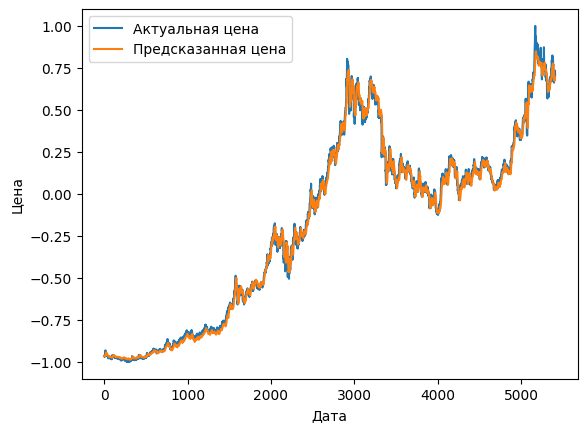

In [ ]:
with torch.no_grad():
  prediction = model(X_train).numpy()

plt.plot(y_train, label = 'Актуальная цена')
plt.plot(prediction, label = 'Предсказанная цена')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()

In [ ]:
train_prediction = prediction.flatten()

dummies=np.zeros((X_train.shape[0], 11))
dummies[:,0] = train_prediction
dummies = scaler.inverse_transform(dummies)

train_prediction = dummies[:,0]

In [ ]:
dummies=np.zeros((X_train.shape[0], 11))
dummies[:,0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

y_train_new = dummies[:,0]

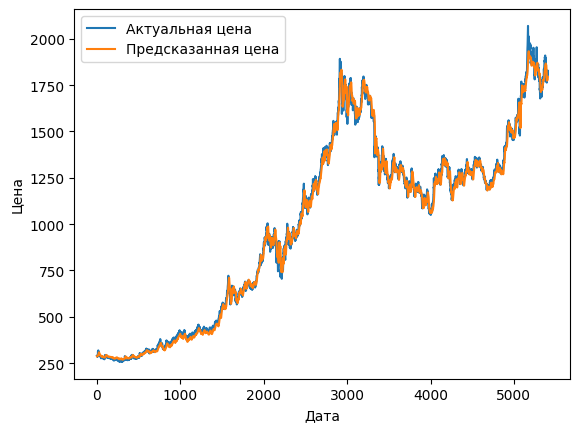

In [ ]:
plt.plot(y_train_new, label = 'Актуальная цена')
plt.plot(train_prediction, label = 'Предсказанная цена')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()